In [2]:
import pandas as pd

# Read in file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Check the first 5 rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<AxesSubplot:>

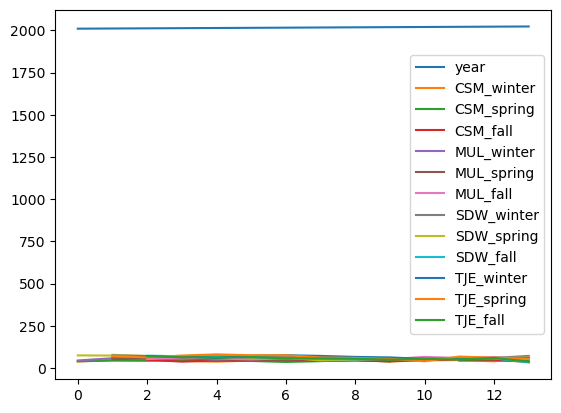

In [3]:
# Default plot(): one line plot per column with numeric data
df.plot()

<AxesSubplot:title={'center':'bird species at mugu lagoon by year'}, xlabel='year', ylabel='num birbs'>

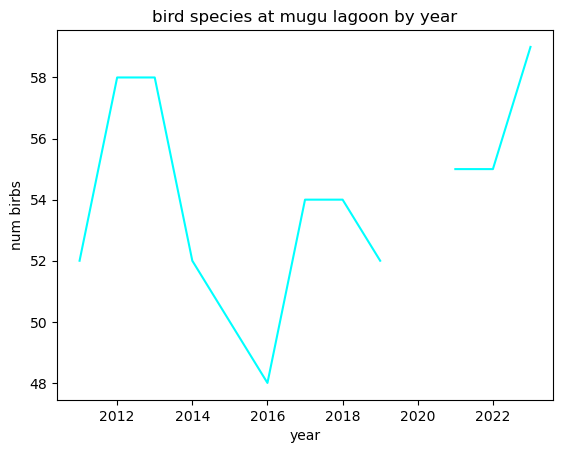

In [4]:
df.plot(x = "year",
       y = "MUL_spring",
       title = "bird species at mugu lagoon by year",
       xlabel = "year",
       ylabel = "num birbs",
       color = "cyan",
       legend = False)

In [5]:
df[df["MUL_spring"].isna()]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


**what is this code doing?**

```{r}
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()
```

1. `set_index('year')` sets the index to be the `year` column
2. `.loc[:,'SDW_winter':'TJE_fall']` is selecting every column in between `SDW_winter` and `TJE_fall`
3. `.plot`, is just plotting the selected columns by year

it is not modifying the df because inplace defaults to False

<AxesSubplot:xlabel='year'>

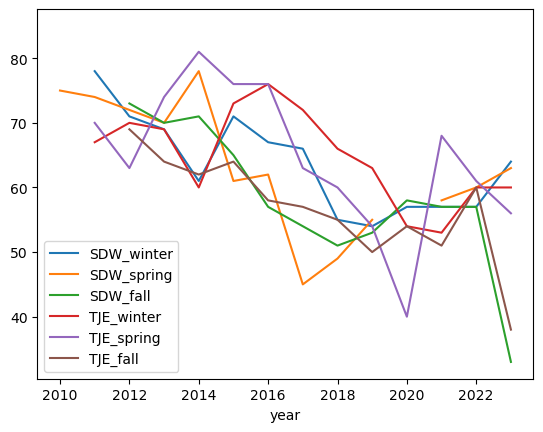

In [6]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

there is some missing data here and there particularly in 2020 but its probably good enough

### summry

plot() is a basic tool for creating and customizing line plots in the pandas package

loc() is a tool for subsetting datasets

## method chaining

the code used in the check-in
`df.set_index('year').loc[:, 'SDW_winter':'TJE_fall'].plot()` is an example of **method chaining**
Each method in the chain returns an object, allowing the next method to be called directly on the result. great technicuq to make ur code concise and readable

can also break line in method chaineing

<AxesSubplot:xlabel='year'>

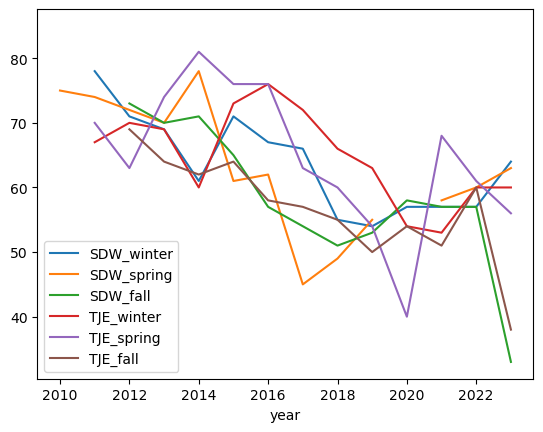

In [8]:
(df.set_index('year')
     .loc[:, 'SDW_winter':'TJE_fall']
     .plot()
)

## about the data

we will use palmerpenguins dataset
data about size measurements for three penguin species in the palmer archipelago during 2007, 2008, 2009

In [11]:
peng_url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
penguins = pd.read_csv(peng_url)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [12]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [13]:
# count unique values in a categorical columns and year
penguins[["species", "island", "sex", "year"]].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [14]:
# get unique value in species column
penguins["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# `kind` argument in `plot()`

`plot()` method creates a line plot by default
if we change the value of the `kind` parameter we can create different kinds of plots

example: scatter

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

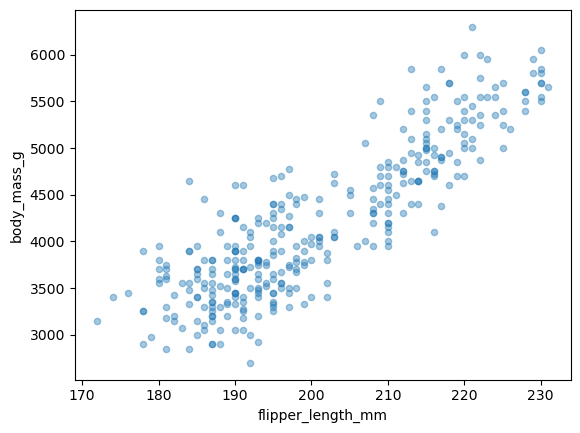

In [17]:
# compare the flipper length against the body mass using a scatterplot

penguins.plot(kind = "scatter",
             x = 'flipper_length_mm',
             y = 'body_mass_g',
             alpha = 0.4)

# hw for next class

do bar plots